# Galactic Dynamics

## Potential Theory


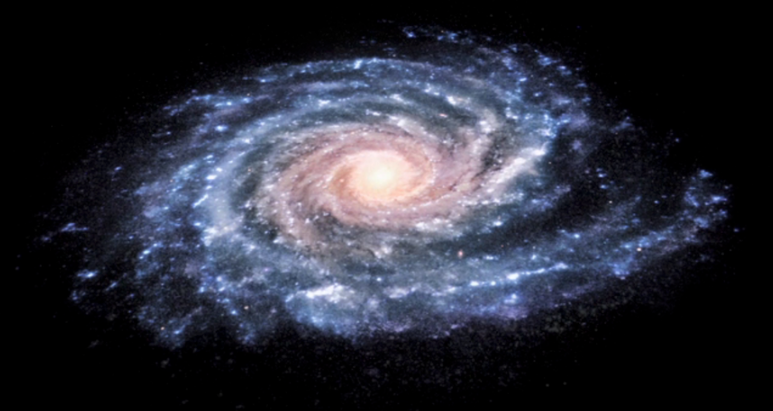


One of the main differences between Galactic dynamics and Planetary dynamics is that in the latter the motion is dominated by a central mass. Whereas in the Solar System 99% of the mass resides in the Sun, in a galaxy the situation is reversed. The central supermassive black hole of the Milky Way counts about a few 10$^6$ solar masses, whereas the galaxy itself has over 10$^{12}$ solar masses. Clearly, in a galaxy, it is not the central mass that dominates. The stuff in the galaxy (stars, gas and dark matter) generate a potential, and stuff moves individually under the influence of this common potential. Instead of adding up the gravity of every single one of the 10$^{11}$ stars in a galaxy, we will smooth their mass density on a scale that is small compared to the size of the galaxy, but big compared to the mean distance between stars. The potential is computed with this averaged mass density, and individual stars will be treated as test particle moving in this potential. 

### Gravitational Potential

What is the force $\mathbf{F}(\mathbf{x})$ on a mass $m_s$ at position $\mathbf{x}$ caused by the gravitational attraction of a distribution of mass with density $\rho(x^\prime) $

Sum all the small contributions

\begin{eqnarray}
d F(\mathbf{x}) &=& G m_s \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} d m(\mathbf{x}^\prime)\\
&=& G m_s \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \rho(\mathbf{x}^\prime) d^3\mathbf{x}^\prime
\end{eqnarray}

And integrate to find the full force, $F (\mathbf{x})= \int dF(\mathbf{x}) = m_s \mathbf{g}(x) $

Defining the acceleration

\begin{equation}
\mathrm{g}(\mathbf{x}) \equiv  G \int \rho(\mathbf{x}^\prime) \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3}  d^3\mathbf{x}^\prime
\end{equation}

If we define the gravitational potential $\Phi(\mathrm{x})$

\begin{equation}
\Phi(\mathbf{x}) \equiv - G \int \frac{\rho(\mathbf{x}^\prime)}{|\mathbf{x}^\prime-\mathbf{x}|}  d^3\mathbf{x}^\prime
\end{equation}

Then we have that 

\begin{equation}
\mathbf{\nabla} \left( \frac{1}{|\mathbf{x}^\prime-\mathbf{x}|} \right) = \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} 
\end{equation}

and the gravitational acceleration can be written as 

\begin{equation}
\mathbf{g} = -\nabla \Phi
\end{equation}


In many situations, it is easier to find $\Phi$ and then take the gradient to find the acceleration. Plus, $\Phi$ is a scalar. 

### Poisson Equation


If we take the divergence of the acceleration

\begin{equation}
\nabla \cdot \mathbf{g}(\mathbf{x}) \equiv  G \int \rho(\mathbf{x}^\prime)  \nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

We need to compute the divergence of the quantity in parentheses. Let us use SymPy for that

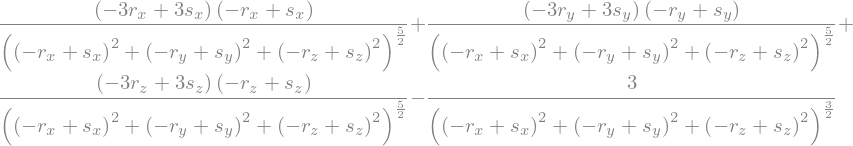

In [1]:
import sympy 
from sympy.physics.vector import ReferenceFrame, divergence
from sympy import init_printing, init_session

init_session(quiet=True)
init_printing() 

r  = ReferenceFrame('r')
s  = ReferenceFrame('s')

xc = r[0]*r.x + r[1]*r.y + r[2]*r.z
xp = s[0]*r.x + s[1]*r.y + s[2]*r.z

mod = sqrt((xp-xc) & (xp-xc))

divfunc = divergence((xp-xc)/mod**3,r)

divfunc



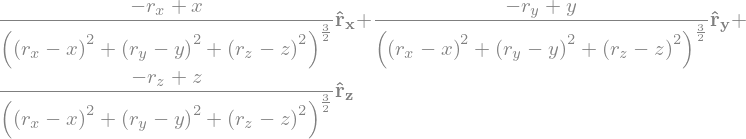

In [2]:
import sympy 
from sympy import init_printing,init_session
from sympy.physics.vector import ReferenceFrame,gradient
from sympy import Symbol

init_session(quiet=True)
init_printing

r = ReferenceFrame('r')

xc  = r[0]*r.x + r[1]*r.y + r[2]*r.z

x=Symbol('x')
y=Symbol('y')
z=Symbol('z')

xp  = x*r.x + y*r.y + z*r.z

mod = sqrt((xc-xp) & (xc-xp))

gradient(1/mod,r)




So, we have that 

\begin{equation}
\nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) = \frac{3(\mathbf{x}^\prime-\mathbf{x})(\mathbf{x}^\prime-\mathbf{x})}{|\mathbf{x}^\prime-\mathbf{x}|^5} - \frac{3}{|\mathbf{x}^\prime-\mathbf{x}|^3}
\end{equation}

When $\mathbf{x}^\prime\neq \mathbf{x}$, the denominators are nonzero, and the expression cancels. Indeed, simplifying the expression we obtained in sympy

In [3]:
simplify(divfunc)

This means that any contribution to $\nabla\cdot \mathbf{g}$ must come from the point $\mathbf{x}=\mathbf{x}^\prime$. We can integrate then in a small region of radius $h$ around this point, and make $h$ as small as we want. When $h$ is sufficiently small, the density is constant in the sphere of radius $h$, and we can remove it from the integral  

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|\leq h}   \nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

We can now change the gradient from $x$ to $x^\prime$

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  - G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|\leq h}   \nabla_{x^\prime} \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

Apply Gauss theorem to remove the divergence, rendering it an area integral on the surface of radius $h$

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  -G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|= h} \frac{(\mathbf{x}^\prime - \mathbf{x})}{h^3} d^2\mathbf{S}^\prime
\end{equation}

The area element $A=\int d^2\mathrm{S}^\prime$ on the surface of a sphere of radius $R$ is related to the solid angle $\Omega$. 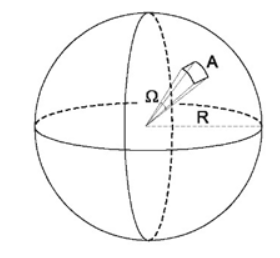

Thus, $|d^2\mathrm{S}^\prime| = h^2 d\Omega$. To keep it vectorial, $h = |\mathbf{x}^\prime-\mathbf{x}|$, and thus  $d^2\mathrm{S}^\prime = (\mathbf{x}^\prime-\mathbf{x})h d\Omega$

The integral then becomes 

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  -G \rho(\mathbf{x}^\prime)\int \frac{1}{h^2}(\mathbf{x}^\prime - \mathbf{x})\cdot (\mathbf{x}^\prime-\mathbf{x}) d\Omega
\end{equation}

And because $(\mathbf{x}^\prime - \mathbf{x})\cdot (\mathbf{x}^\prime-\mathbf{x}) = h^2$

\begin{eqnarray}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) &=&  -G \rho(\mathbf{x}^\prime)\int d\Omega\\
&=&-4\pi G \rho
\end{eqnarray}

Substituting now $\mathbf{g} = -\nabla\Phi$, we obtain $\bf{Poisson's \ equation}$ relating the potential and the density

\begin{equation}
\boxed{\boxed{\nabla^2\Phi=  4\pi G \rho}}
\end{equation}

### Spherically symmetric potentials

Isaac Newton proved two theorems for spherically symmetric systems, that great simplify obtaining their potential.

##### Newton's first theorem

A body that is inside a spherical shell of matter experiences no net gravitational force from that shell. 


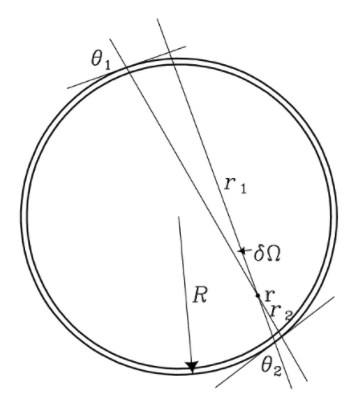


This is geometrically seen from the figure above. Considering the cone of the solid angle $\delta \Omega$ and centered at $r$. The cone intersects the shell at two locations, of angular extent $\theta_1=\delta \Omega/r_1^2$ and $\theta_2=\delta \Omega/r_2^2$. The $dm_1$ and $dm_2$ contained in these arcs are thus in the ratio  


\begin{equation}
\frac{dm_1}{dm_2} = \left(\frac{r_1}{r_2}\right)^2
\end{equation}

Hence

\begin{equation}
\frac{dm_2}{r_2^2} = \frac{dm_1}{r_1^2} 
\end{equation}

so at point $r$ the acceleration is equal from opposite directions. Integrating over all directions the sum is zero, proving that there is no net force experienced inside the spherical symmetric shell. 

As a consequence of the theorem, if the acceleration $\mathbf{g}=-\nabla\Phi$ is zero, then the potential $\Phi$ is constant. So, we can take the potential at any point inside the shell and it will give the potential anywhere. For convenience, we choose the center. Any mass distribution is at a distance $R$, so the potential is 

\begin{equation}
\boxed{\Phi(R) = - \frac{GM}{R}}
\end{equation}


##### Newton's second theorem

The gravitational force on a body that lies outside a spherical shell of matter is the same as it would be if all the shell's matter were concentrated into a point at its center. 





Poisson's equation $\nabla^2\Phi=  4\pi G \rho$ in case of a spherical system takes a simpler form. 

\begin{equation}
\frac{1}{r^2}\frac{\partial}{\partial r} \left( r^2 \frac{\partial \Phi}{\partial r} \right) = 4\pi G \rho(r)
\end{equation}

Multiply both sides by $r^2$ and integrate it once in limits going from $0$ to $r$

\begin{equation}
\left. r^{\prime 2} \frac{\partial \Phi}{\partial r^\prime} \right\vert_0^{r} = 4\pi G \int_0^r \rho(r^\prime) r^{\prime 2} dr^\prime 
\end{equation}

The integral in the RHS is the mass enclosed by the Gaussian surface. At $r=0$ the lower term in the LHS cancels (if $d\Phi/dr$ at $r=0$ is finite), and hence  

\begin{equation}
\frac{\partial \Phi(r)}{\partial r}  = \frac{GM}{r^2} 
\end{equation}

Integrating again in $r$

\begin{equation}
\Phi(r) = -\frac{GM}{r}
\end{equation}

which is identical to the potential if all the shell mass was concentrated as a point mass.

### Gravitational Potential Energy

Given $\rho$ and $\Phi$, what is the total gravitational energy $W$ of the system?

By definition, $\Phi$ is the potential energy of a unit mass at the position $\mathbf{x}$. If we bring in additional mass $\delta m$ from infinity to position $\mathbf{x}$, the work done is $\delta m \Phi(\mathbf{x})$. This contributes an extra density $\delta \rho$, and the change in potential energy is 

\begin{equation}
\delta W =  \int \Phi(\mathbf{x}) \ \delta \rho \ dV
\end{equation}

The change in density produces, according to Poisson's equation, a change in the potential 

\begin{equation}
\nabla^2 \left(\delta \Phi\right)  =  4\pi G \delta \rho 
\end{equation}


We substitute that in the equation for $\delta W$ 


\begin{equation}
\delta W =  \frac{1}{4\pi G}\int \Phi \ \nabla^2 \left(\delta \Phi\right) \ dV
\end{equation}

Because the Laplacian is the divergence of the gradient 


\begin{equation}
\delta W =  \frac{1}{4\pi G}\int \Phi \ \nabla \cdot \left[ \nabla \left( \delta \Phi\right)\right] \ dV
\end{equation}

We apply Gauss' theorem here to remove the divergence 

\begin{equation}
\delta W =  \frac{1}{4\pi G}\int \Phi \ \nabla \left( \delta \Phi\right) \cdot d\mathbf{A} - \frac{1}{4\pi G}\int \nabla \Phi \cdot \nabla \left( \delta \Phi\right) \ dV
\end{equation}

The surface integral vanishes because the potential is zero at infinity. The second integral remains 


\begin{equation}
\delta W =  - \frac{1}{4\pi G}\int \nabla \Phi \cdot \nabla \left( \delta \Phi\right) \ dV
\end{equation}

Because 

\begin{equation}
\nabla \Phi \cdot \nabla \left( \delta \Phi\right) = \frac{1}{2}\delta \left(\nabla \Phi \cdot \nabla \Phi \right) = \frac{1}{2}\delta \vert \left(\nabla \Phi \right) \vert^2
\end{equation}

we find 

\begin{equation}
\delta W =  - \frac{1}{8\pi G}\delta \left(\int \vert \left(\nabla \Phi \right) \vert^2 \ dV \right)
\end{equation}

And summing all the contributions $\delta W$, we have the total gravitational energy 

\begin{equation}
 W =  - \frac{1}{8\pi G} \int \vert \left(\nabla \Phi \right) \vert^2 \ dV 
\end{equation}


Another form of this expression involves $\Phi$ and $\rho$. Integrating by parts 

\begin{equation}
\int  \left(\nabla \Phi \right)^2  \ dV = -\int \Phi \nabla^2 \Phi \ dV
\end{equation}

and using Poisson's equation again, $\nabla^2\Phi = 4\pi G \rho$

\begin{equation}
 W =  \frac{1}{2} \int \rho \Phi \ dV 
\end{equation}




### Examples of spherically symmetric potential-density pairs

#### Homogeneous sphere

If the density is constant inside a radius R and zero outside 

\begin{equation}
\rho = \left\{ \begin{array}{cc} 
\rho_0 & \mathrm{if} \ r \leq R \\
0 & \mathrm{if} \ r > R
\end{array} \right.
\end{equation}

the mass distribution is 

\begin{equation}
M(r) =  4\pi \int_0^{r} \rho(r^\prime) \ r^{\prime 2} \ dr^\prime 
\end{equation}

which integrates to 

\begin{equation}
M(r) = \frac{4\pi \rho_0}{3}\times\left\{ \begin{array}{cc} 
r^2 & \mathrm{if} \ r \leq R \\
R^3 & \mathrm{if} \ r > R
\end{array} \right.
\end{equation}


For the potential, if we are outside the sphere, it is, according to Newton's second theorem, simply $-GM/r$. Inside the sphere, we need to integrate. The potential can be considered to be a contribution of the different shells of mass $dM(r) = 4\pi \rho(r) r^2 dr$. Because of Newton's second theorem, we can separate the mass distribution into inside and outside the radius r, and inside it we consider the mass as a point mass 

\begin{equation}
\Phi(r) = -\frac{G M(r)}{r} - G\int_r^\infty \frac{dM(r^\prime)}{r^\prime} 
\end{equation}


which yields 


\begin{eqnarray}
\Phi(r) &=& -\frac{4\pi}{3} G\rho_0 r^2 - 4\pi G \rho_0 \int_r^R r^\prime dr^\prime \\
&=& -2\pi G \rho_0 \left( R^2 - \frac{r^2}{3}\right)
\end{eqnarray}

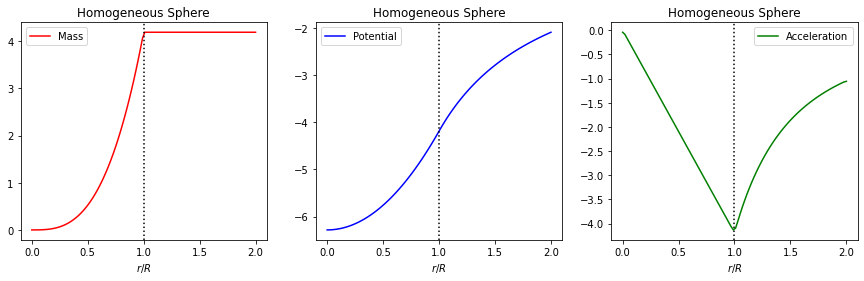

In [4]:
import numpy as np
import pylab as plt
import matplotlib 
%matplotlib inline  

R = 1
G = 1
rho0 = 1
n = 100
M = 4*np.pi/3 * R**3

r = np.linspace(0,2*R,n)
Phi = np.zeros(n)
Mass = np.zeros(n)
g = np.zeros(n)

for i in range(n):
    if (r[i] <= R):
        Phi[i] = -2*np.pi*G*(R**2 - r[i]**2/3)
        Mass[i] = 4*np.pi/3 * r[i]**3
    else: 
        Phi[i] = -G*M/r[i]
        Mass[i] = M

        
g = -np.gradient(Phi)/np.gradient(r)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,4),sharex=True)

axs[0].plot(r,Mass,label='Mass',color='red')
axs[1].plot(r,Phi,label='Potential',color='blue')
axs[2].plot(r,g,label='Acceleration',color='green')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$r/R$')
    ax.axvline(1,linestyle=':',color='black')
    ax.set_title("Homogeneous Sphere")
    
    
plt.show()    

### Dark halos

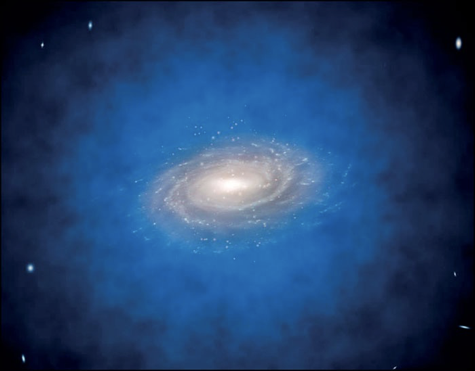


Dark matter does not interact with matter except gravitationally. As a result, any loss of energy is negligible, and the orbit of a dark matter particle does not settle into a disk like stars and gas. So, the dark matter distribution around a galaxy should be spherically symmetric. Much attention has been devoted to models where the density is given by 


\begin{equation}
\rho(r) = \frac{\rho_0}{(r/a)^\alpha (1+r/a)^{\beta-\alpha}}
\end{equation}


The model with $\alpha = 1$ and $\beta=3$ is called the ${\bf NFW \ model}$ (after Navarro, Frenk, & White, 1995)

\begin{equation}
\rho(r) = \frac{\rho_0}{(r/a) (1+r/a)^2}
\end{equation}


Accordingly, the mass of the halo with this density distribution is 

\begin{equation}
M(r) =  4\pi \int_0^{r} \rho(r^\prime) \ r^{\prime 2} \ dr^\prime 
\end{equation}


The mass M(r) enclosed by a sphere of radius r is M(r)= 


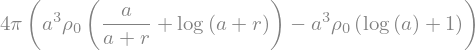

In [5]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')

rho = rho0/((rp/a)*(1+rp/a)**2)

#rho

print("The mass M(r) enclosed by a sphere of radius r is M(r)= ")
mass=4*sp.pi*integrate(rho*rp**2,(rp,0,r))

mass



The mass $M(r)$ enclosed by a sphere of radius $r$ is

\begin{equation}
\boxed{
M(r) = 4\pi \rho_0 a^3  \left[ \ln\left(1+r/a\right)  -\frac{r/a}{(1+r/a)} \right]
}
\end{equation}


The gravitational potential is given by 

\begin{equation}
\Phi = -G\int_r^{\infty} \frac{M(r)}{r^2} dr
\end{equation}

The potential Phi(r) of a NFW dark matter halo is:


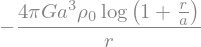

In [6]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')
G= sp.Symbol('G')

mass = 4*sp.pi*a**3*rho0* (sp.log(1+rp/a) - (rp/a)/(1+rp/a))

print("The potential Phi(r) of a NFW dark matter halo is:")

Phi = integrate(-G*mass/rp**2,(rp,r,infty))

Phi


The potential $\Phi(r)$ of a NFW dark matter halo is

\begin{equation}
\boxed{
\Phi = -4\pi G \rho_0 a^2\frac{\ln(1+r/a)}{r/a}
}
\end{equation}

<ipython-input-7-202e2e6a7b18>:12: RuntimeWarning: invalid value encountered in true_divide
  Phi = -4*np.pi*G*a**3*rho0*np.log(1 + r/a)/r


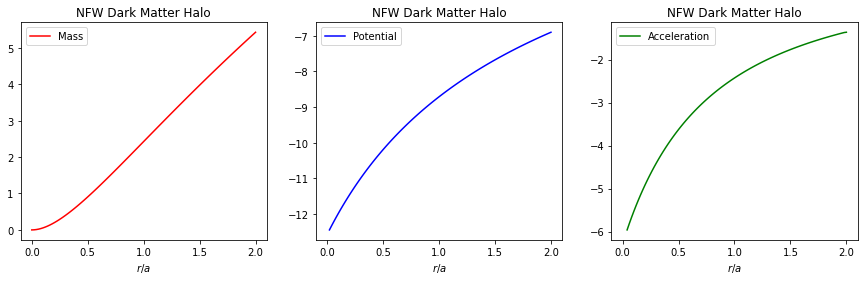

In [7]:
import numpy as np
import pylab as plt

a = 1
G = 1
rho0 = 1
n = 100

r = np.linspace(0,2*a,n)

Mass = 4*np.pi*a**3*rho0* (np.log(1+r/a) - (r/a)/(1+r/a))
Phi = -4*np.pi*G*a**3*rho0*np.log(1 + r/a)/r        
g = -np.gradient(Phi)/np.gradient(r)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,4),sharex=True)

axs[0].plot(r,Mass,label='Mass',color='red')
axs[1].plot(r,Phi,label='Potential',color='blue')
axs[2].plot(r,g,label='Acceleration',color='green')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$r/a$')
    ax.set_title("NFW Dark Matter Halo")

### Non-spherical potentials

Apart from the halo, little else in a galaxy is spherically symmetric. The disk is essentially flat, and the bulge is ellipsoidal in shape. Elliptical galaxies are mosty a bulge and, thus, also ellipsoidal. Irregular galaxies come in any shape and, for those, the potential should be derived numerically. Let us consider here the potential for disks and ellipsoidals. With these three (spherical, ellipsoidal, flattened), we will have the potential of the three components of a spiral galaxy (halo, bulge, disk) and can compute the orbits of stars with reasonable realism.

In general, non-spherical systems are much more difficult to handle. Still, we can solve some simple and astronomically interesting cases. 

#### Infinite disk


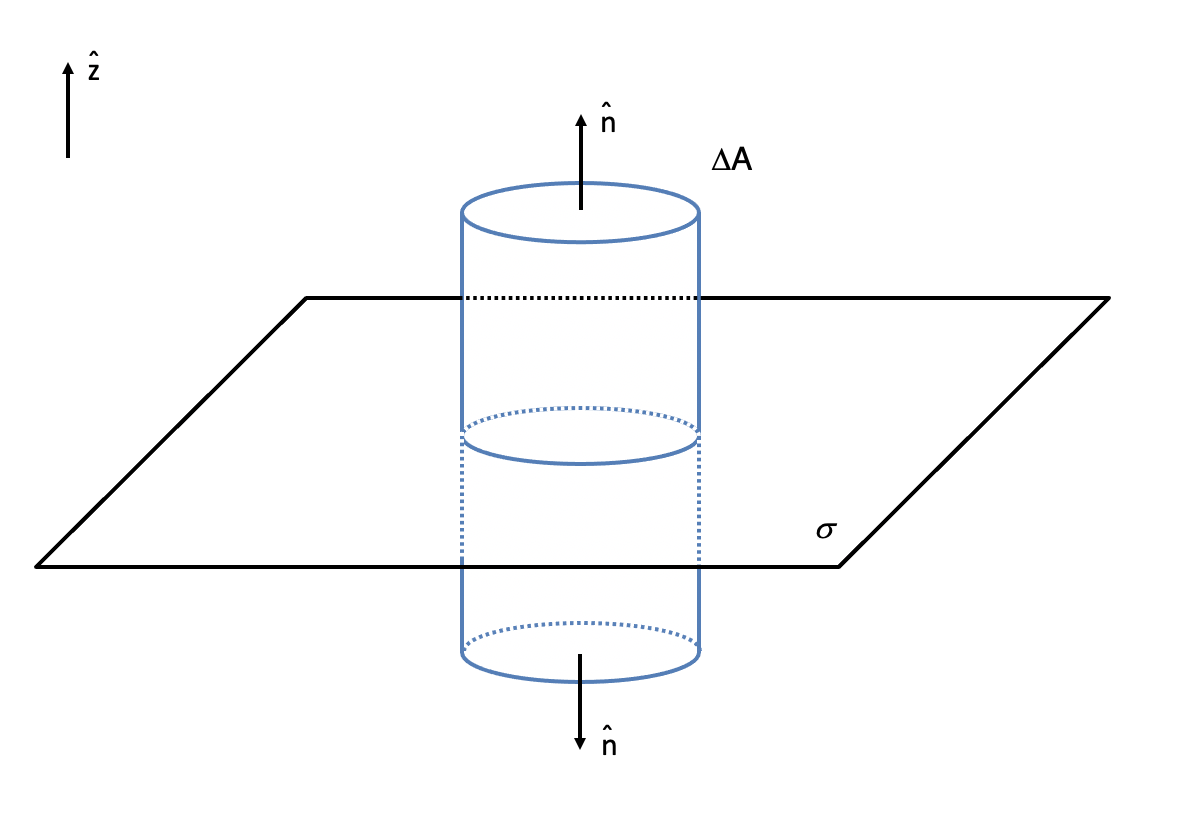


A simple model for stellar disks. An infinite sheet of mass with constant surface density $\sigma$. Because of the plane symmetry, the only non-zero component of $\mathbf{g}$ is in the vertical direction, $g_z$. Using Gauss law to find it 

\begin{equation}
\oint \mathbf{g} \cdot d\mathbf{A} = \int g_z dA =  -4\pi G M 
\end{equation}

the enclosed mass is $M = \sigma \Delta A$. Thus, 

\begin{equation}
\int g_z dA  = -4\pi G \sigma \Delta A  
\end{equation}

and for constant acceleration, $\int g_z dA = g_z \times 2 \Delta A $, leading to 

\begin{equation}
g_z  = -2\pi G \sigma  
\end{equation}

That is 

\begin{equation}
\mathbf{g}  = -2\pi G \sigma \ \hat{\mathbf{n}}
\end{equation}

where $\hat{\mathbf{n}}$ is the normal to the surface, that is, $\hat{\mathbf{n}} = \hat{\mathbf{z}}$ if $z>0$, and $\hat{\mathbf{n}} = -\hat{\mathbf{z}}$ if $z<0$.  Another way to write this is 

\begin{equation}
\mathbf{g}  = -2\pi G \sigma \ \frac{\mathbf{z}}{|z|}
\end{equation}

Integrate this now to find 

\begin{equation}
\frac{d\Phi}{dz}  = -g_z \quad \longleftrightarrow \quad\Phi = 2\pi G \sigma |z|
\end{equation}


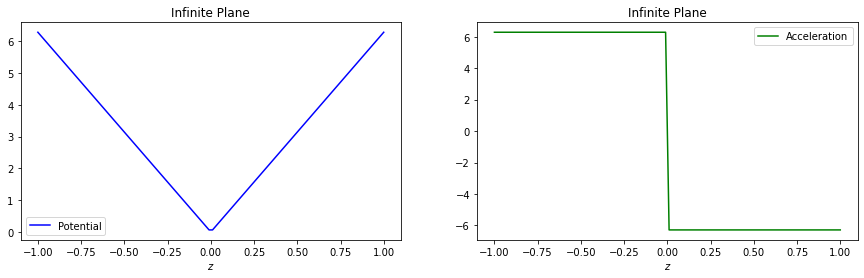

In [8]:
import numpy as np
import pylab as plt

G = 1
sigma0 = 1
n = 100

z = np.linspace(-1,1,n)

Phi = 2*np.pi*G*sigma0*np.abs(z)
g = -2*pi*G*sigma0*z/np.abs(z)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,4),sharex=True)

axs[0].plot(z,Phi,label='Potential',color='blue')
axs[1].plot(z,g,label='Acceleration',color='green')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$z$')
    ax.set_title("Infinite Plane")

Notice that we can find the same result via the Poisson equation. Consider the density distribution being $\rho(R,z) = \sigma(R) \delta(z)$

\begin{equation}
\nabla^2 \Phi  = 4\pi G \sigma \delta(z)
\end{equation}

Expanding the Laplacian 

\begin{equation}
\frac{1}{R}\frac{\partial}{\partial R} \left(R \frac{\partial\Phi}{\partial R}\right) +  \frac{\partial^2\Phi}{\partial z^2}  = 4\pi G \sigma \delta(z)
\end{equation}


Because of the very flattened distribution, the LHS is dominated by the $z$ term around the midplane, where the mass distribution is. We ignore the first term and write 

\begin{equation}
\frac{\partial^2\Phi}{\partial z^2}  \approx 4\pi G \sigma \delta(z)
\end{equation}


This is an important insight, that applies to almost any thin disk: ${\bf Even \ if \ the \ density \ varies \ in \ radius, \ the \ vertical \ variation \ in \ a \ flattened \ disk \ is \ so \ much \ more \ extreme \ that \ it \ dominates \ the \ potential.}$ 

We now integrate it twice in $z$. Integrating once  

\begin{equation}
\int_{-\infty}^{\infty} \frac{\partial^2 \Phi}{\partial z^2} dz  = 4\pi G \sigma \int_{-\infty}^\infty  \delta(z) dz
\end{equation}


The integration in the RHS removes the Dirac delta 

\begin{equation}
\int_{-\infty}^{\infty} \frac{\partial^2 \Phi}{\partial z^2} dz  = 4\pi G \sigma 
\end{equation}


Since most of the contribution arises from $z=0$, let us integrate the LHS in a small region around the midplane, from -$z$ to $z$

\begin{equation}
\int_{-z}^{z} \frac{\partial^2 \Phi}{\partial z^{\prime 2}} dz^\prime  = 4\pi G \sigma 
\end{equation}

The LHS integral is obviously the 1st derivative of $\Phi$ 

\begin{equation}
\frac{\partial \Phi(z)}{\partial z} - \frac{\partial \Phi(-z)}{\partial z}   = 4\pi G \sigma 
\end{equation}


And because the potential is symmetric, $\Phi^\prime(-z) = \Phi^\prime(z)$, so 

\begin{equation}
\frac{\partial \Phi(z)}{\partial z} = 2\pi G \sigma 
\end{equation}

and integrating again 

\begin{equation}
\boxed{\Phi(z)  = 2\pi G \sigma |z|}
\end{equation}


#### Thick disk

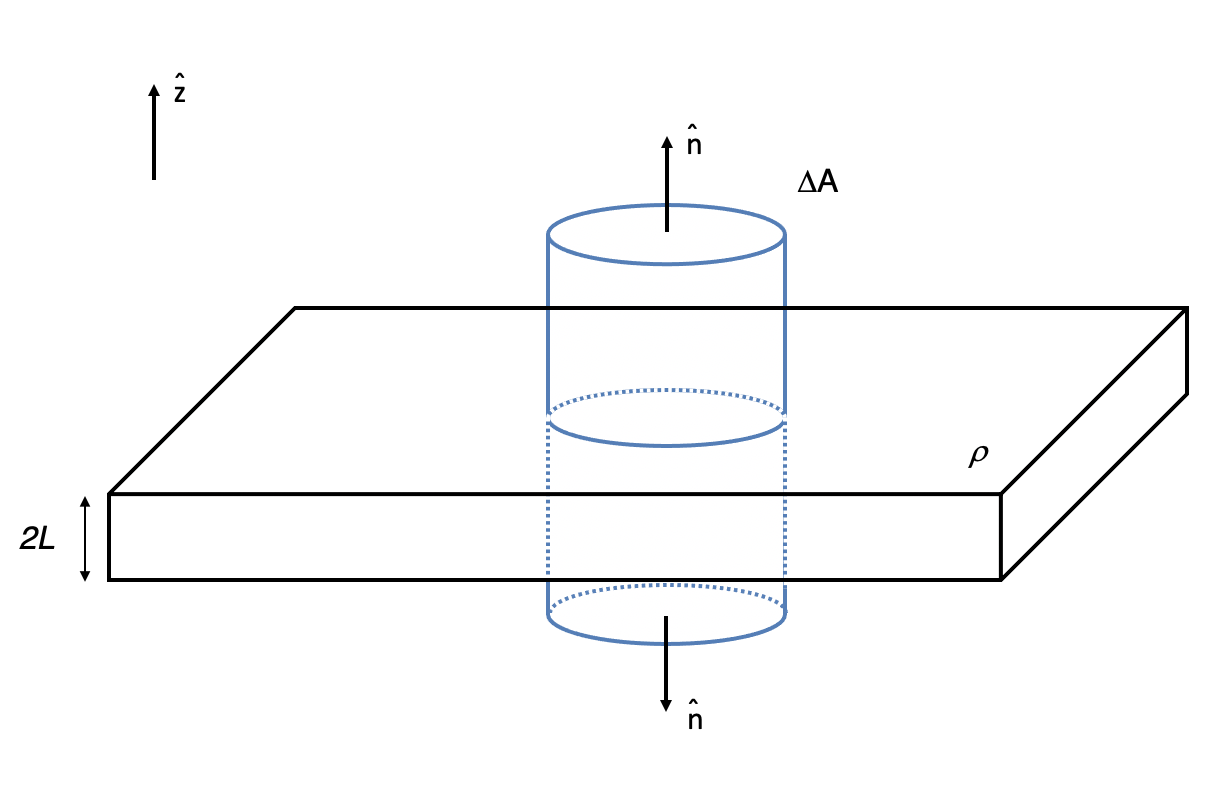


A thick disk has constant density $\rho_0$ within a thickness $2L$, the disk height. The column density is $2\rho_0 L$. Due to symmetry, again the acceleration is only in z. We can again apply Gauss' law 

\begin{equation}
\oint \mathbf{g} \cdot d\mathbf{A} = \int g_z dA =  -4\pi G M 
\end{equation}

But now the mass distribution is 

\begin{equation}
M(z) = \left\{ \begin{array}{cc} 
2\rho_0 L  \Delta A & \mathrm{if} \ |z| \geq L \\
2\rho_0 |z| \Delta A  & \mathrm{if} \ |z| < L
\end{array} \right.
\end{equation}

The acceleration in the positive $z$ direction is thus 

\begin{equation}
g(z) = -4\pi G \rho_0 \left\{ \begin{array}{cc} 
L & \mathrm{if} \ z \geq L \\
z & \mathrm{if} \ 0 < z < L
\end{array} \right.
\end{equation}

And the potential is found integrating this 


\begin{equation}
\Phi(z) = 2\pi G \rho_0 \left\{ \begin{array}{cc} 
2Lz & \mathrm{if} \ z \geq L \\
z^2  & \mathrm{if} \ 0 < z < L
\end{array} \right.
\end{equation}


So the potential is parabolic if inside the disk, and linear if outside. 


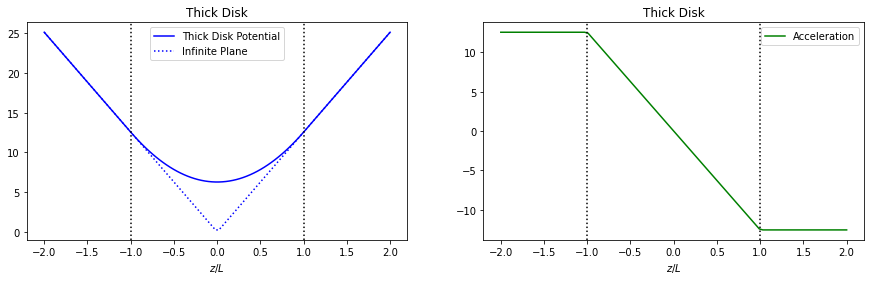

In [9]:
import numpy as np
import pylab as plt

G = 1
rho0 = 1
n = 100
L = 1

z = np.linspace(-2*L,2*L,n)

Phi = np.zeros(n)
g = np.zeros(n)

Phi0 = 2*np.pi*G*rho0*L**2

for i in range(n):
    if (abs(z[i]) <= L):
        Phi[i] = 2*np.pi*G*rho0*z[i]**2 + Phi0
        g[i] = -4*np.pi*G*rho0*z[i] 
    else: 
        Phi[i] = 4*np.pi*G*rho0*L*abs(z[i])
        g[i] = -4*np.pi*G*rho0*L*sign(z[i])

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,4),sharex=True)

axs[0].plot(z,Phi,label='Thick Disk Potential',color='blue')
axs[1].plot(z,g,label='Acceleration',color='green')


axs[0].plot(z,4*np.pi*G*rho0*L*abs(z),label='Infinite Plane',color='blue',linestyle='dotted')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$z/L$')
    ax.set_title("Thick Disk")
    ax.axvline(1,linestyle=':',color='black')
    ax.axvline(-1,linestyle=':',color='black')

### Ellipsoidal potentials

Less trivial non-spherical distributions usually lead to messy algebra, and the potentials usually end up being described by special functions. Yet, ellipsoidal mass distributions are important in astrophysics, since the vertical direction in galaxies is in hydrostatic equilibrium, whereas the radial direction is centrifugally supported. That the radial and vertical direction are supported differently leads to non-axisymmetry, and ellipsoidal shapes, like the galactic bulge. Also, disks can be seen as extremely flattened ellipsoids, so the potential derived is applicable to them as well. 

An ellipsoidal has shape given by

\begin{equation}
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = \beta^2 \equiv \mathrm{const.}
\end{equation}

with the semi-axes $a$ and $b$ being similar, whereas $c$ is smaller. To compute their potential, we will do the same procedure as we did for spherically symmetric distributions. Consider a spherically symmetric shell, and integrate over all shells. The difference is that the shells in this case are thin ellipsoids. These are called $\mathbf{homeoids}$. 

### Homeoid

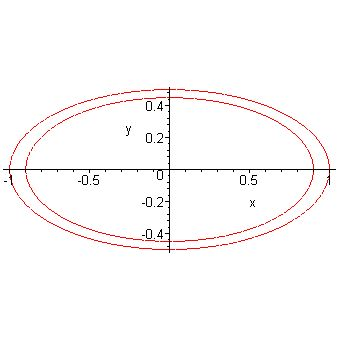


A homeoid is a shell bounded by two similar ellipsoids having a constant ratio of axes. Considering the ellipsoidal shape, we write  

\begin{equation}
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = \beta^2
\end{equation}

a homeoid will be bound by two surfaces of same semi-axes $a$,$b$ and $c$, but different values of $\beta$. The quantity $\beta$ labels the homeoid. A spherical shell is a symmetric case of a homeoid, where $a=b=c$ and $\beta=1$.

The volume of an ellipsoid of semiaxes $a\beta$, $b\beta$, and $c\beta$, is  

\begin{equation}
V = \frac{4\pi}{3}abc \beta^3 
\end{equation}

considering $a=b$ and $c=a\sqrt{1-e^2}$,

\begin{equation}
V = \frac{4\pi}{3}a^3 \sqrt{1-e^2} \beta^3 
\end{equation}

taking the derivative with respect to $\beta$ we find the volume of an homeoid

\begin{equation}
dV = 4\pi a^3 \sqrt{1-e^2} \beta^2 d\beta 
\end{equation}

In this thin shell we consider the density constant. That means that a homeoid has mass $dM$

\begin{equation}
dM = \rho dV = 4\pi \rho(\beta) a^3 \sqrt{1-e^2} \beta^2 d\beta 
\end{equation}

we can switch variable to $m = \beta a $ (not confuse with mass), and thus 

\begin{equation}
dM = \rho dV = 4\pi \rho(m) \sqrt{1-e^2} m^2 dm 
\end{equation}


For a spherical system this reduces to the usual formula $dM = 4\pi \rho(r)  r^2 dr$.


#### Potential of a homeoid 


##### Elliptic coordinates

Spherically symmetric objects call for spherical coordinates. Elliptic objects call for elliptic coordinates. We will solve the Poisson equation in these coordinates, identifying the $R$ as the long axis and $z$ as the short axis. Polar elliptic coordinates ($u,\nu$) are a orthogonal coordinate system defined such that 

\begin{eqnarray}
R &=& f \ \mathrm{cosh} u  \ \sin \nu\\
z &=& f \  \mathrm{sinh} u  \ \cos \nu\\
\end{eqnarray}


The trigonometric identity 

\begin{equation}
\frac{R^2}{f^2\mathrm{cosh} u} + \frac{z^2}{f^2\mathrm{cosh} u} = \cos^2\nu + \sin^2\nu = 1
\end{equation}


shows that curves of constant $u$ form ellipses - the ellipses are confocal (at $R=f$) but different eccentricities. The hyperbolic trigonometric identity

\begin{equation}
\frac{R^2}{f^2\cos\nu} - \frac{z^2}{f^2\sin\nu} = \mathrm{cosh}^2 u - \mathrm{sinh}^2 u = 1
\end{equation}

shows that curves of constant $\nu$ form hyperbolae. The figure below shows the coordinate system 

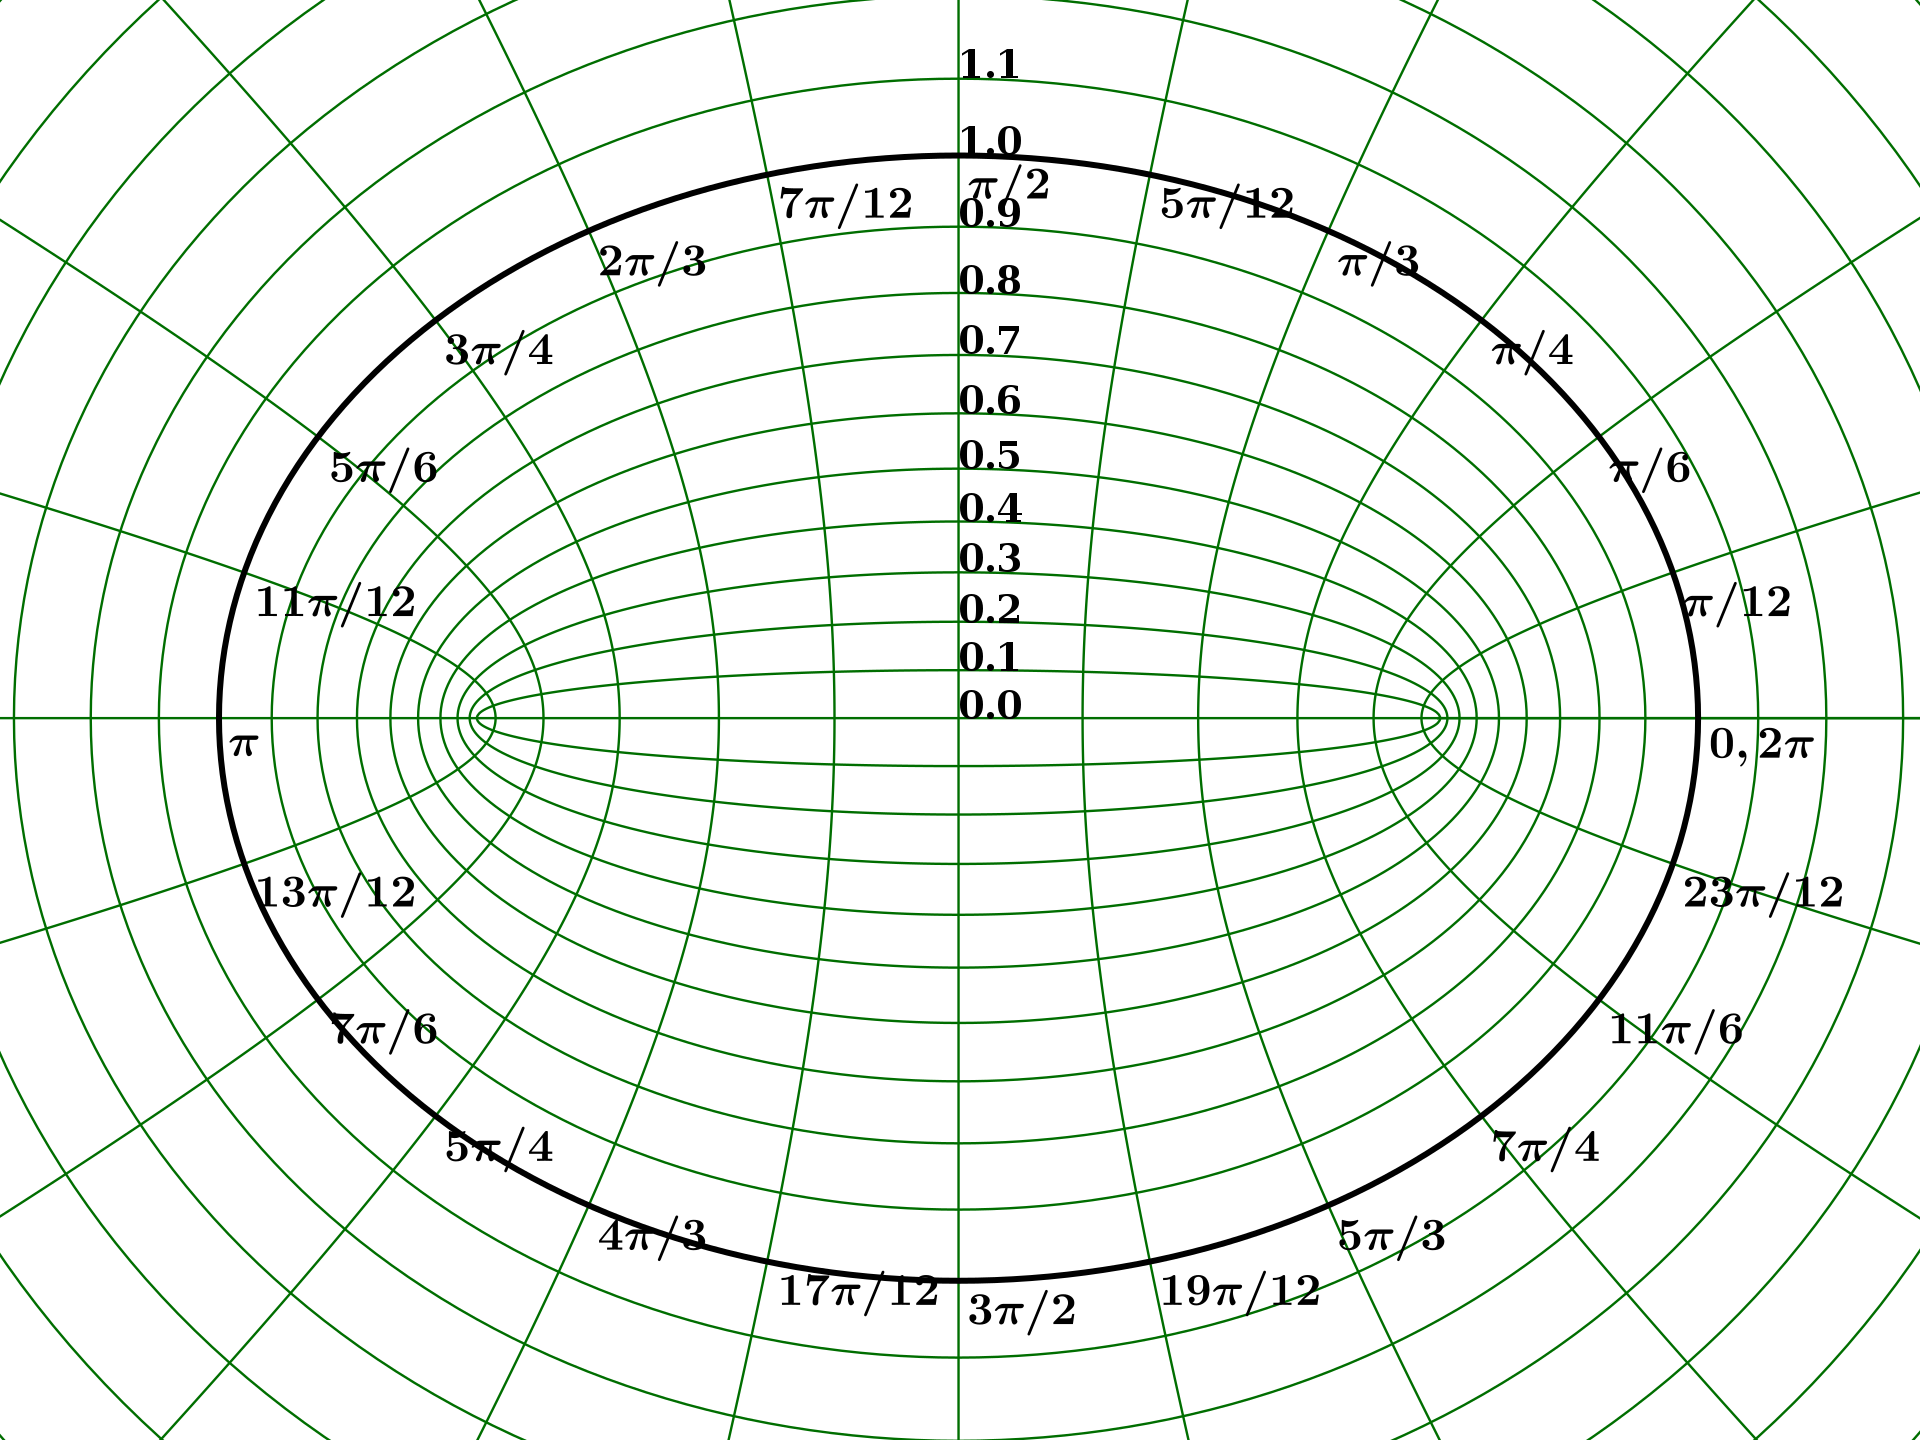


The scale factors of the coordinate system are 


\begin{eqnarray}
h_u = h_v &=& f\sqrt{\mathrm{sinh}^2 u + \cos^2\nu}
h_\phi &=& f \mathrm{cosh}^u\sin\nu
\end{eqnarray}


So the Laplacian is 

\begin{equation}
\nabla^2 = \frac{1}{h_1h_2h_3} \left[ \frac{\partial}{\partial u_1} \left(\frac{h_2h_3}{h_1} \frac{\partial}{\partial u_1} \right)+\frac{\partial}{\partial u_2} \left(\frac{h_1h_3}{h_2} \frac{\partial}{\partial u_2} \right)+\frac{\partial}{\partial u_3} \left(\frac{h_1h_2}{h_3} \frac{\partial}{\partial u_3} \right)
\right]
\end{equation}


let's compute it with sympy 




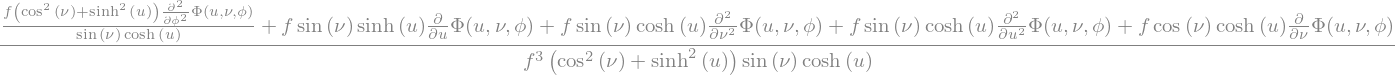

In [10]:

from sympy import diff

f = symbols('f')
u = symbols('u')
nu = symbols('nu')
phi = symbols('phi')
Phi = Function('Phi')(u,nu,phi)

h1 = f * sp.sqrt((sp.sinh(u))**2 + sp.cos(nu)**2)
h2 = h1 
h3 = f * sp.cosh(u)*sp.sin(nu)


du=sp.diff(h2*h3/h1 * sp.diff(Phi,u),u)

dv=sp.diff(h1*h3/h2 * sp.diff(Phi,nu),nu)

dp=sp.diff(h1*h2/h3 * sp.diff(Phi,phi),phi)


laplacian = 1/(h1*h2*h3) * (du+dv+dp) 

sp.simplify(laplacian)



Well, that looks horrible. Luckily, we are interested in potentials that depend on $u$ only. For potentials of this class, $\nabla^2 \Phi = 0$  reduces to 


\begin{equation}
\frac{d}{du} \left( \mathrm{cosh} u \frac{d\Phi}{du}\right)=0
\end{equation}

The solution is either $\Phi$ constant, or $\Phi^\prime = A\,\mathrm{sech}\,u$, with constant $A$. Integrating, we find the potential 

\begin{equation}
\Phi = -A\sin^{-1}\left(\mathrm{sech}\,u\right) + B 
\end{equation}


This potential should yield the spherical potential if we convert back to polar coordinates. For large $u$, the eccentricity of the confocal ellipse approaches zero. Ignoring the $\sin\nu$,  we have that $\mathrm{sech}\,u = f/R$. So, the potential scales like  


\begin{equation}
\Phi = -A\sin^{-1}\left(\frac{f}{R}\right) + B 
\end{equation}

at large R, the arcsin is the function, so  

\begin{equation}
\mathrm{lim}_{R \gg f }\ \Phi = -A\left(\frac{f}{R}\right) + B 
\end{equation}

If $B =0$ and $A = G\delta M/f$ with $\delta M$ the mass of the homeoid, then indeed the potential is equal to that of a shell of mass $\delta M$, tending to zero at infinity. We thus conclude that the integration constants are indeed 

\begin{eqnarray}
A&=&\frac{G\delta M}{f}\\
B&=&0
\end{eqnarray}

We take these values of $A$ and $B$ for the general potential, also setting it constant inside the shell. 

\begin{equation}
\delta\Phi = -\frac{G\delta M}{f} \times \left\{ \begin{array}{cc} 
\sin^{-1}(\mathrm{sech}\,u_0) & \mathrm{if} \ u < u_0 \\
\sin^{-1}(\mathrm{sech}\,u) & \mathrm{if} \ u \geq u_0
\end{array} \right.
\end{equation}

This is the potential of a shell at $u=u_0$. We can write this potential in terms of the eccentricity, noticing that $f$ is the focal length, so $f=ae$. Also, $u_0$ is related to the eccentricity of the shell. The semiaxes have length $a = f \mathrm{cosh} u_0$, and $c=f\mathrm{sinh} u_0$. Hence, the hyperbolic tangent of $u_0$ is $c/a$. Thus, we have the trigonometic identity  

\begin{equation}
 \mathrm{sech} \ u_0 = \sqrt{1-\frac{c^2}{a^2}}  \equiv e 
\end{equation}


Thus, the homeoid potential is 

\begin{equation}
\boxed{
\delta\Phi = -\frac{G\delta M}{ae} \times \left\{ \begin{array}{ll} 
\sin^{-1}(e) & \mathrm{if} \ u < u_0 \\
\sin^{-1}(\mathrm{sech}\,u) & \mathrm{if} \ u \geq u_0
\end{array} \right.}
\end{equation}


Substituting what we found for the mass of the homeoid, $\delta M = 4\pi \rho(m) \sqrt{1-e^2} m^2 \delta m$

The potential inside the homeoid is  


\begin{equation}
\delta \Phi_{\rm int} = -4\pi G \rho(m) \ m \ \delta m \frac{\sqrt{1-e^2}}{e}\sin^{-1}(e)
\end{equation}

and the potential outside the homeoid is 


\begin{equation}
\delta \Phi_{\rm ext} = -4\pi G \rho(m) \ m \ \delta m \frac{\sqrt{1-e^2}}{e}\sin^{-1} \mathrm{sech}\left(u_m\right)
\end{equation}


### Homogeneous ellipsoid

\begin{equation}
\pi G \rho_0 \left(A_1 R^2 + A_3 z^2 - Ia^2 \right) 
\end{equation}

where $I$, $A_1$, and $A_3$ are dimensionless coefficients. The table below (from Binney & Tremaine's "Galactic Dynamics") lists the coefficients for oblate, prolate, and triaxial cases. Our case of interest is oblate.

![Screen%20Shot%202021-03-29%20at%2010.11.45%20PM.png](attachment:Screen%20Shot%202021-03-29%20at%2010.11.45%20PM.png)




If $a=b > c$, the coefficients are 

\begin{eqnarray}
A_1 = A_2 &=& \frac{(1-e^2)^{1/2}}{e^2}\left[\frac{\sin^{-1} e}{e} -(1-e^2)^{1/2}\right]\\
A_3&=&\frac{2(1-e^2)^{1/2}}{e^2}\left[\frac{1}{(1-e^2)^{1/2}} - \frac{\sin^{-1} e}{e}\right]\\
I &=& \frac{2(1-e^2)^{1/2}}{e}\sin^{-1} e
\end{eqnarray}

where $e$ is the eccentricity

\begin{equation}
e^2\equiv 1-\frac{c^2}{a^2} 
\end{equation}

##### Small eccentricity - spherical limit 

At small eccentricity $e \ll 1$, the arcsin is $\sin^{-1} e \approx e + e^3/6$, so 

\begin{eqnarray}
A_1=A_2=A_3 &=& \frac{2}{3}\\
I &=& 2
\end{eqnarray}

The potential of the small eccentricity oblate spheroid is thus 

\begin{equation}
\Phi(\mathbf{x}) = \pi G \rho_0 \left(\frac{2}{3} R^2 + \frac{2}{3} z^2 - 2a^2 \right) 
\end{equation}

We should recover the spherical potential $\Phi=-GM/r$ in this case. Indeed, substituting $R^2+z^2=a^2=r^2$, 


\begin{equation}
\Phi(r) = -\frac{4\pi}{3} G \rho_0 r^2  
\end{equation}

and replacing $M = 4\pi/3 \  r^3\rho_0 $, we indeed find $\Phi=-GM/r$ as expected. 

##### Unity eccentricity -- disk limit 

At $e=1$, the arcsin is $\sin^{-1} 1 = \pi/2$. The second term in parentheses in $A_3$ is finite whereas the first is infinity. Dropping it, the numerator and denominator $1-e^2$, and 

\begin{eqnarray}
A_1=A_2 = I &=& 0 \\
A_3&=&2
\end{eqnarray}

So in this limit ($e\approx 1$, $a\gg c$) 

\begin{equation}
\Phi \approx 2\pi G \rho_0 z^2 
\end{equation}


Two theorems are true for homeoid mass shells: 

1. The exterior isopotential surfaces of a homeoid are spheroids that are confocal with the shell. 
2. Inside the homeoid the potential is constant (Newton's third theorem).





### Homogeneous ellipsoid

For homogeneous ellipsoid of density $\rho = \rho_0$ and shape 

\begin{equation}
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1
\end{equation}

The total potential is obtained by integrating the potential of all the homeoids 

\begin{equation}
d\Phi(\mathbf{x}) = \pi G \rho_0 \left(A_1 x^2 + A_2 y^2 + A_3 z^2\right) - \phiG\rho_0I \int_0^1 a^2 da \right) 
\end{equation}




has gravitational potential 

\begin{equation}
\Phi = \pi G \rho_0 (Ax^2 + By^2 + Cz^2) 
\end{equation}

where the coefficients $A$, $B$, and $C$ are non-trivial integrals 

\begin{eqnarray}
A &=& abc\int_0^\infty \frac{1}{f(a^2+\lambda)}d\lambda\\
B &=& abc\int_0^\infty \frac{1}{f(b^2+\lambda)}d\lambda\\
C &=& abc\int_0^\infty \frac{1}{f(c^2+\lambda)}d\lambda
\end{eqnarray}

and 

\begin{equation}
f^2 \equiv (a^2+\lambda)(b^2+\lambda)(c^2+\lambda)
\end{equation}


The Poisson equation gives the relation between A, B, and C 

\begin{equation}
\nabla^2 \Phi = 4\pi G \rho
\end{equation}

Leading to 

\begin{equation}
A + B + C = 2
\end{equation}



### Spheroids with inhomogeneous density distribution

Logic: 

1. start with a thin shell (homeiod) 
2. find the potential of the thin shell
3. integrate over all shells 


This is the same procedure we did for the sphericall symmetric case, but instead of integrating over spherical shells, we integrate over oblate shells (homeoids). 




#### Axis-symmetry

If we consider axisymmetry, a constant density homeoid has constant density, and the axes are related by 

\begin{equation}
R^2 + \frac{z^2}{1-e^2} = m^2
\end{equation}

The potential can only be a function of $m$ and $e$, $\Phi = \Phi(m,e)$. An application of astrophysical interest is the bulge density 

\begin{equation}
\rho(m) = \rho_0 \left[ 1 + \left(\frac{m}{a_0}\right)^2\right]^{-3/2}  
\end{equation}

where $a_0$ is the core radius, and $e$ the eccentricity. The circular velocity is 

\begin{equation}
v^2_c (R)  = R\frac{\partial\Phi}{\partial R} 
\end{equation}

yielding

\begin{equation}
v^2_c (R)  = 4\pi G\rho_0 a^3 \frac{\sqrt{1-e^2}}{R} k \left[F(\theta_a,k) - E(\theta_a,k) \right]
\end{equation}

Where $F$ and $E$ are incomplete elliptical integrals and 

\begin{equation}
k = \left[\left(\frac{a_0e}{R}\right)^2+1\right]^{-1/2} 
\end{equation}


#### Exponential disk

For a thin disk with radial exponential profile, $\Sigma = \Sigma_0 e^{-R/R_d}$, the potential in the midplane is 

\begin{equation}
\Phi(R,0) = -\pi G\Sigma_0 R \left[ I_0(y) K_1(y) - I_1(y) K_0(y) \right]
\end{equation}

where 

\begin{equation}
y \equiv \frac{R}{2R_D} 
\end{equation}

and $I$ and $K$ are the modified Bessel functions. The corresponding circular velocity is 

\begin{equation}
v^2_c(R) = R\frac{\partial\Phi}{\partial R}  = 4\pi G\Sigma_0 R_d y^2 \left[ I_0(y) K_0(y) - I_1(y) K_1(y) \right]
\end{equation}







<ipython-input-11-3e240c13369d>:8: RuntimeWarning: divide by zero encountered in true_divide
  C=2*np.sqrt(1-e**2)/e**2 * (1/np.sqrt(1-e**2) - np.arcsin(e)/e)
<ipython-input-11-3e240c13369d>:8: RuntimeWarning: invalid value encountered in multiply
  C=2*np.sqrt(1-e**2)/e**2 * (1/np.sqrt(1-e**2) - np.arcsin(e)/e)


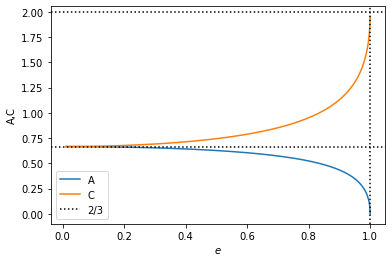

In [11]:
import numpy as np 
import pylab as plt

e=np.linspace(1e-2,1,10000)

A = np.sqrt(1-e**2)/e**2 * (np.arcsin(e)/e - np.sqrt(1-e**2))
B = A 
C=2*np.sqrt(1-e**2)/e**2 * (1/np.sqrt(1-e**2) - np.arcsin(e)/e)

plt.plot(e,A,label='A')
plt.plot(e,C,label='C')
plt.axhline(2/3,linestyle=":",color='black',label='2/3')
plt.axhline(2,linestyle=":",color='black')
plt.axvline(1,linestyle=":",color='black')

plt.xlabel(r'$e$')
plt.ylabel('A,C')


legend()
